Introduction to Python
================================

Lesson 2 - Part 2
--------

## Summary

In this Lesson we will start using Python in order to create some models.

The models that we will create are:
  - Linear

In order to do so we must intruduce some important libraries:

  - Pandas
  - Sklearn
  - Numpy

In [23]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [24]:
from IPython.display import display, HTML

## Linear Model

Now we will create a linear model using the data of the `diabetes`  dataset of `SKLearn`.

The description of the dataset, taken from the [Doc. Page](http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset), says:

*Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.*

We will use the **body max index** to predict the **target variabile**, i.e. the measure of disease progression one year after baseline.

The same analysis is done 3 times on order to show you how to handle it by using:

  - `Numpy`
  - `Pandas`
  - `R`

## Numpy  solution

Let's see how to solve the problem using `Numpy`.

**NOTE**: the graph at the end of the analysis is done using the library `matplotlib.pyplot`

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
display(diabetes)
print('The type of diabetes.data:',type(diabetes.data),diabetes.data.shape)
print('The type of diabetes.target:',type(diabetes.target),diabetes.target.shape)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

The type of diabetes.data: <class 'numpy.ndarray'> (442, 10)
The type of diabetes.target: <class 'numpy.ndarray'> (442,)


In [13]:
# Use only one feature
#diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X = diabetes.data[:,2].reshape(-1,1)
print(diabetes_X.shape)

(442, 1)


In [14]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
print('Dimension of diabetes_X_train:',diabetes_X_train.shape)
print('Dimension of diabetes_X_test:',diabetes_X_test.shape)

Dimension of diabetes_X_train: (422, 1)
Dimension of diabetes_X_test: (20, 1)


In [15]:
print(diabetes.target.shape)

(442,)


In [8]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
print('Dimension of diabetes_y_train:',diabetes_y_train.shape)
print('Dimension of diabetes_y_test:',diabetes_y_test.shape)

Dimension of diabetes_y_train: (422,)
Dimension of diabetes_y_test: (20,)


**NOTE**: as you can see the shape of train and test are different. This is necessary because the linear regression needs an `x` variables to be a **2D array**

In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)

Coefficients: 
 [938.23786125] 152.91886182616167


In [17]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 2548.07
Variance score: 0.47


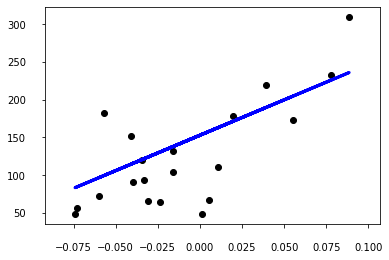

In [18]:
# Plot outputs

#Scatter and line
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#Axis 
plt.tick_params(axis='both', which='major', labelsize=10, pad=15)
plt.tick_params(axis='y', which='minor', labelsize=10, pad=15)

#Print graph
plt.show()


## Pandas  solution

Let's see how to solve the problem using `Pandas`.

Again the graph at the end of the analysis is done using the library `matplotlib.pyplot`.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

testDim = 20
nrows = diabetes.data.shape[0]
index = ['patient_%i'%i for i in range(0,nrows)]
df = pd.DataFrame(diabetes.data,
                  columns=['Age','Sex','Body_mass_index','Average_blood_pressure','S1','S2','S3','S4','S5','S6'],
                  index=index)
df.head()

,Age,Sex,Body_mass_index,Average_blood_pressure,S1,S2,S3,S4,S5,S6
patient_0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
patient_1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
patient_2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
patient_3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
patient_4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [20]:
# d_X = df.iloc[:,2]
d_X = df[['Body_mass_index']]
d_Y = pd.DataFrame(diabetes.target)
d_X_train = d_X.iloc[:-testDim]
d_X_test = d_X.iloc[-testDim:]
print('Dimension of d_X_train:',d_X_train.shape)
print('Dimension of d_X_test:',d_X_test.shape)
d_Y_train = d_Y.iloc[:-testDim]
d_Y_test = d_Y.iloc[-testDim:]
print('Dimension of d_Y_train:',d_Y_train.shape)
print('Dimension of d_Y_test:',d_Y_test.shape)

Dimension of d_X_train: (422, 1)
Dimension of d_X_test: (20, 1)
Dimension of d_Y_train: (422, 1)
Dimension of d_Y_test: (20, 1)


In [21]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(d_X_train, d_Y_train)

# Make predictions using the testing set
d_Y_pred = regr.predict(d_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_,regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(d_Y_test, d_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(d_Y_test, d_Y_pred))

Coefficients: 
 [[938.23786125]] [152.91886183]
Mean squared error: 2548.07
Variance score: 0.47


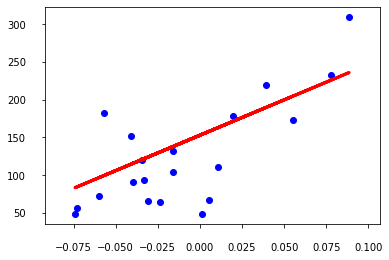

In [22]:
# Plot outputs
plt.scatter(d_X_test, d_Y_test,  color='blue')
plt.plot(d_X_test, d_Y_pred, color='red', linewidth=3)

plt.tick_params(axis='both', which='major', labelsize=10, pad=15)
plt.tick_params(axis='y', which='minor', labelsize=10, pad=15)

plt.show()


## R solution

Let's see how to solve the problem using R.

Please note how it is easier to plot the graph with R.

In [27]:
%%R -i df,d_Y
library(dplyr)
library(magrittr)
library(ggplot2)



nrow=dim(df)[1]
ntest=20
df['target']=d_Y
df %<>%
  select(Body_mass_index,target)
df_Train=df[1:(nrow-ntest),]
df_Test=df[(nrow-ntest+1):nrow,]

model=lm(target ~ Body_mass_index,data=df_Train)

print(model)

pred=predict.lm(model,df_Test)
df_Test %>% 
  mutate(pred=pred) %>% 
  ggplot() +
  geom_point(aes(Body_mass_index,target)) +
  geom_line(aes(Body_mass_index,pred))   



Call:
lm(formula = target ~ Body_mass_index, data = df_Train)

Coefficients:
    (Intercept)  Body_mass_index  
          152.9            938.2  

   Body_mass_index target      pred
1      0.077863388    233 225.97324
2     -0.039618128     91 115.74763
3      0.011039039    111 163.27611
4     -0.040695940    152 114.73639
5     -0.034229068    120 120.80385
6      0.005649979     67 158.21989
7      0.088641508    310 236.08568
8     -0.033151256     94 121.81510
9     -0.056863122    183  99.56773
10    -0.030995632     66 123.83759
11     0.055229334    173 204.73711
12    -0.060096558     72  96.53400
13     0.001338730     49 154.17491
14    -0.023450947     64 130.91630
15    -0.074108115     48  83.38782
16     0.019661536    178 171.36606
17    -0.015906263    104 137.99500
18    -0.015906263    132 137.99500
19     0.039062153    220 189.56845
20    -0.073030303     57  84.39907


## Random Forest Classificator

Now we'll use a rando forest on th on the breast cancer dataset ([Man. Page](http://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset)).


In [28]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as rfc
data = load_breast_cancer()
df_X=pd.DataFrame(data.data)
df_Y=data.target
print('shape di df_X:',df_X.shape)
print('shape di df_Y:',df_Y.shape)

shape di df_X: (569, 30)
shape di df_Y: (569,)


In [31]:
nrow=df_X.shape[0]
ntest=50
df_X_train=df_X.head(nrow-ntest)
df_Y_train=df_Y[0:(nrow-ntest)]
df_X_test=df_X.tail(ntest)
df_Y_test=df_Y[(nrow-ntest):nrow]
print(df_Y_test.shape)
print(df_X_train.shape)

(50,)
(519, 30)


In [32]:
model = rfc(n_jobs=-1,oob_score=True,n_estimators=100)
print('Model parameters:',model)
model.fit(df_X_train,df_Y_train)
print('Importance of the features',model.feature_importances_)
print('Acuracy od the model during train is: %i%s'%(int(model.oob_score_*100),'%'))
pred=model.predict(df_X_test)
diff=pred-df_Y_test
diff=sum(abs(diff))
acc=1-diff/len(df_Y_test)
print('Accuracy of the model on the test set: %i%s'%(int(acc*100),'%'))
print('Accuracy of the model on the test set: %i%s'%(int(model.score(df_X_test,df_Y_test)*100),'%'))

Model parameters: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)
Importance of the features [0.02167747 0.01766958 0.05020904 0.04770791 0.00563849 0.00858251
 0.03154427 0.14043083 0.0034478  0.00371859 0.00940857 0.00628556
 0.01020445 0.03926586 0.00385977 0.00461897 0.00542371 0.00473793
 0.0044656  0.00347441 0.07241677 0.02000318 0.13151742 0.14686314
 0.01241576 0.02067694 0.04700713 0.10505706 0.01306361 0.00860769]
Acuracy od the model during train is: 94%
Accuracy of the model on the test set: 96%
Accuracy of the model on the test set: 96%


**NOTE**: we can do the same analysis in a easier way.

In [54]:
from sklearn.model_selection import cross_val_score
model = rfc(n_jobs=-1,n_estimators=10)
scores = cross_val_score(model, data.data, data.target, cv=10)
# scores = cross_val_score(model,XFake,YFake, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))           



Accuracy: 0.96 (+/- 0.05)


## Exponential fit

In the last part of this lesson we'll see how to implement a function ad try to find the best parameters in order to obtain the best fit.

For this scope we'll use the function `optimize.minimize` of `sicpy` ([library page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [37]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

baskets = np.array([475, 108, 2, 38, 320])
scaling_factor = np.array([95.5, 57.7, 1.4, 21.9, 88.8])

def lsq(arg):
    a = arg[0]*100
    b = arg[1]*100
    c = arg[2]*0.1
    now = a - (b*np.exp(c * baskets)) - scaling_factor
    return np.sum(now**2)

def pred(arg):
    a = arg[0]*100
    b = arg[1]*100
    c = arg[2]*0.1
    ret = a - (b*np.exp(c * baskets))
    return ret

guesses = [1, 1, -0.9]
res = scipy.optimize.minimize(lsq, guesses)

print('Message:',res.message)

print('X:',res.x)

print([lsq(guesses), lsq(res.x)])

Message: Optimization terminated successfully.
X: [ 0.97336709  0.98685365 -0.07998282]
[7761.00933580766, 13.055053196410453]


13.055053196410453

<function matplotlib.pyplot.show(*args, **kw)>

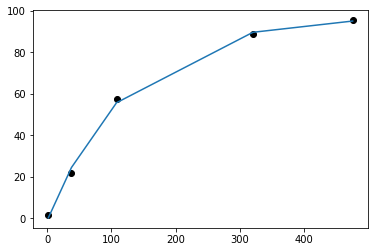

In [36]:
#Reorder of variabiles
baskets=np.sort(baskets)
scaling_factor=np.sort(scaling_factor)
#Prevision
prev=pred(res.x)
#Plot
plt.scatter(baskets,scaling_factor,color='black')
plt.plot(baskets,prev)
plt.show

## End Exercise 

Following the examples above we want to use the *Boston Houses* dataset to create a linear model.

We want to:
  1. import the dataset (se below)
  2. Separate target and data
  3. Select 3 feautres 
  3. Split train and test: the last 50 samples are for the test  
  4. Train the model 
  
Hint:

```
from sklearn import datasets 
ds  = datasets.load_boston()
```

In [43]:
from sklearn import datasets 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

dimTest = 50

ds  = datasets.load_boston()
display(ds)
type(ds)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

sklearn.utils.Bunch

In [44]:
dfX = pd.DataFrame(ds.data) 
listNames = list(ds.feature_names)
dfX.columns = listNames
dfX.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [45]:
col2Use = ['CRIM','INDUS','RAD']
dfX_sel = dfX.loc[:,col2Use]
print('Shape di dfX_sel',dfX_sel.shape)

Shape di dfX_sel (506, 3)


In [46]:
dfX_test = dfX_sel.iloc[-dimTest:,:]
dfX_train = dfX_sel.iloc[:dfX_sel.shape[0]-dimTest,:]
print('Len di dfX_test: %i, len di dfX_train: %i'%(dfX_test.shape[0],dfX_train.shape[0]))

Len di dfX_test: 50, len di dfX_train: 456


In [47]:
dfY = pd.DataFrame(ds.target)
dfY_test = dfY.iloc[-dimTest:,:]
dfY_train = dfY.iloc[:dfY.shape[0] - dimTest,:]

In [48]:
model = LinearRegression()
model.fit(dfX_train,dfY_train)
Y_pred = model.predict(dfX_test)
mean_squared_error(dfY_test,Y_pred,)

19.607566151347612

## Tips and Tricks

Let's focous on some tricks to increase performance.

### How to append a line to a DF

In [49]:
%%timeit -n 1 -r 1
dfFake2 = pd.DataFrame({'a':[1],'b':[2]})
for i in range(0,10000):
    curDF = pd.DataFrame({'a':[1],'b':[2]}) 
    dfFake2 = dfFake2.append(curDF)
print(dfFake2.shape)
print(dfFake2.head())

(10001, 2)
   a  b
0  1  2
0  1  2
0  1  2
0  1  2
0  1  2
5.79 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
dfFake2

In [50]:
%%timeit -n 1 -r 1
retList = []
for i in range(0,10001):
    curDict = {'a':1,'b':2}
    retList.append(curDict)
dfFake3 = pd.DataFrame(retList)
print(dfFake3.shape)
print(dfFake3.head())

(10001, 2)
   a  b
0  1  2
1  1  2
2  1  2
3  1  2
4  1  2
19.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### `n_jobs` PARAMETER

In [51]:
import numpy as np
import pandas as pd
data = load_breast_cancer()
type(data.target
    )
dfFake=pd.DataFrame()
YFake=np.ndarray(shape=(1,0))
XFake=np.ndarray(shape=(0,30))
for i in range(0,1000):
    XFake=np.append(XFake,data.data,axis=0)
    YFake=np.append(YFake,data.target)
print(XFake.shape)

(569000, 30)


In [55]:
scores = cross_val_score(model,XFake,YFake, cv=10)